## The information gathered is from the DAEWOO Steel Co. Ltd in Gwangyang, South Korea.



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Data cleaning

In [21]:
data = pd.read_csv('Steel_industry_data.csv')
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [22]:
#Drop the index column
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [23]:
data.shape

(35040, 11)

In [24]:
## check and remove duplicates

duplicate_rows = data[data.duplicated()]
duplicate_rows

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type


In [25]:
## check missing values

data.isnull().sum().sort_values(ascending=False)

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [26]:
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [27]:
## delete 'Leading_Current_Power_Factor' as it seems it s just dummy data

data = data.drop(['Leading_Current_Power_Factor'], axis=1)

In [28]:
# Convert 'date' column to specific format
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')

In [29]:
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,85500,Weekday,Monday,Light_Load


In [30]:
## check for 0 values

zero_counts = (data == 0).sum().sort_values(ascending=False)
zero_counts

Leading_Current_Reactive_Power_kVarh    23610
CO2(tCO2)                               20990
Lagging_Current_Reactive.Power_kVarh     7194
NSM                                       365
Usage_kWh                                   1
Lagging_Current_Power_Factor                1
date                                        0
WeekStatus                                  0
Day_of_week                                 0
Load_Type                                   0
dtype: int64

In [31]:
zero_in_usage = data[data['Usage_kWh'] == 0]
zero_in_usage

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
29855,2018-11-07,0.0,0.0,0.0,0.0,0.0,0,Weekday,Wednesday,Light_Load


### Data visualize and analysis

In [32]:
average_usage = data.groupby('Day_of_week')['Usage_kWh'].mean().reset_index()

fig = px.bar(average_usage, 
             x='Day_of_week', 
             y='Usage_kWh', 
             title='Average Usage kWh by Week Status',
             labels={'Usage_kWh': 'Average Usage (kWh)', 'WeekStatus': 'Week Status'})

# Afișăm graficul
fig.show()

In [33]:
avg_co2 = data.groupby('Day_of_week')['CO2(tCO2)'].mean().reset_index()


fig = px.bar(avg_co2, 
             x='Day_of_week', 
             y='CO2(tCO2)', 
             title='Average CO2 Emissions by Day of the Week',
             labels={'CO2(tCO2)': 'Average CO2 (tCO2)', 'Day_of_week': 'Day of Week'})


fig.show()

In [34]:
## 'Load_type column will be used for classification tests'

load_type_counts = data['Load_Type'].value_counts().reset_index()
load_type_counts.columns = ['Load_Type', 'Count']

fig = px.pie(load_type_counts, 
             names='Load_Type', 
             values='Count', 
             title='Percentage of Load Types')

fig.show()


### Correlation Matrix Heatmap

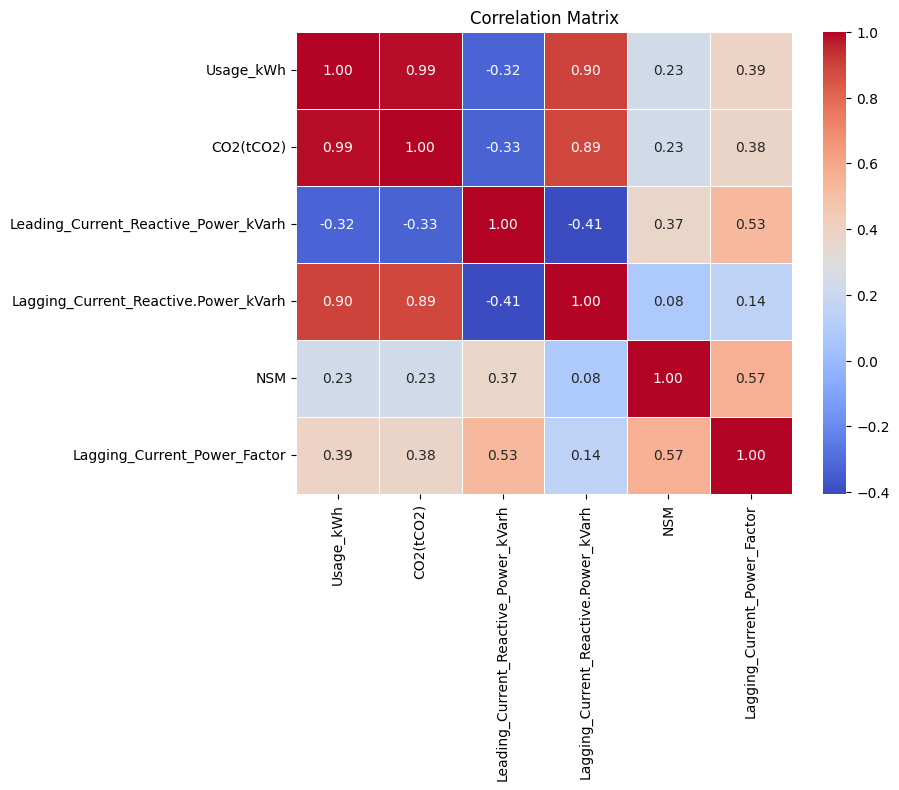

In [40]:
params_df = data[['Usage_kWh', 'CO2(tCO2)', 'Leading_Current_Reactive_Power_kVarh', 
                   'Lagging_Current_Reactive.Power_kVarh', 'NSM', 'Lagging_Current_Power_Factor']]


correlation_matrix = params_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

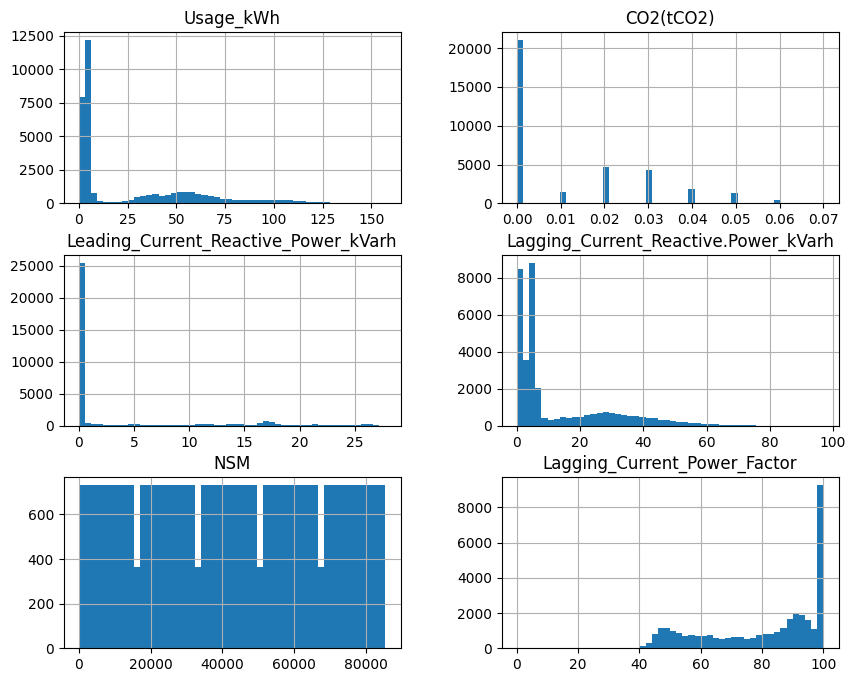

In [41]:
import matplotlib.pyplot as plt

params_df.hist(figsize=(10, 8), bins=50)
plt.show()


In [42]:
### save the dataframe in an excel to be used for ML alghoritms

data.to_csv("Steel_industry_cleaned_data.csv")
